In [ ]:
!pip install ultralytics
!pip install roboflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 731.7/731.7 MB 39.7 MB/s eta 0:00:01^C
ERROR: Operation cancelled by user


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (AMD EPYC 7B12)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.5/107.7 GB disk)


In [ ]:
from roboflow import Roboflow
from ultralytics import YOLO

import os
import matplotlib.pyplot as plt

In [ ]:
#Test Dataset with 1000 images

rf = Roboflow(api_key="JBU0OG5sEsv3hvwp8yPq")
project = rf.workspace("febro-dataset").project("safety-hard-hat-detection")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.1.29, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Safety-Hard-Hat-Detection-1 in yolov8:: 100%|██████████| 3066/3066 [00:02<00:00, 1433.91it/s]


In [ ]:
#Test Dataset with 7542 images

rf = Roboflow(api_key="pgfdld6AKPFvTfkQA2Fb")
project = rf.workspace("febro-herdyanto-cqhmk").project("safety-hardhat-detection")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.29, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Safety-Hardhat-Detection-1 in yolov8:: 100%|██████████| 23026/23026 [00:05<00:00, 3911.71it/s]


In [ ]:
!ls

cvevals  Safety-Hard-Hat-Detection-1


In [ ]:
#Train YOLOv8s on 1000 Data
# https://universe.roboflow.com/febro-dataset/safety-hard-hat-detection/dataset/1

!yolo detect train model=yolov8s.pt data=/content/Safety-Hard-Hat-Detection-1/data1000.yaml epochs=100 imgsz=640

100% 21.5M/21.5M [00:00<00:00, 227MB/s]
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Safety-Hard-Hat-Detection-1/data1000.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

In [ ]:
#Train YOLOv8s on 7542 Data
!yolo detect train model=yolov8s.pt data=/content/Safety-Hardhat-Detection-1/data7542.yaml epochs=100 imgsz=640

In [ ]:
!cd runs

In [ ]:
os.chdir('/content/runs/detect/train2')

In [ ]:
!ls

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1710682100.668673707e6e.9815.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch6930.jpg  weights
P_curve.png					    train_batch6931.jpg
PR_curve.png					    train_batch6932.jpg


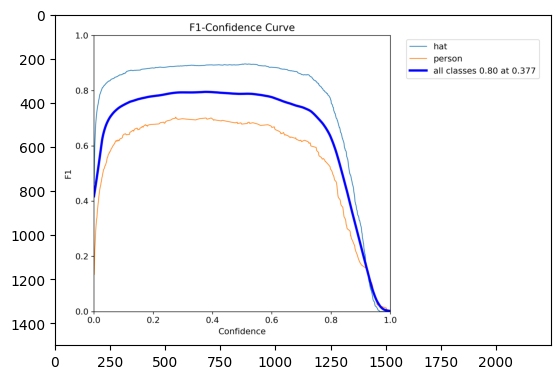

In [ ]:
img = plt.imread('F1_curve.png')
plt.imshow(img)

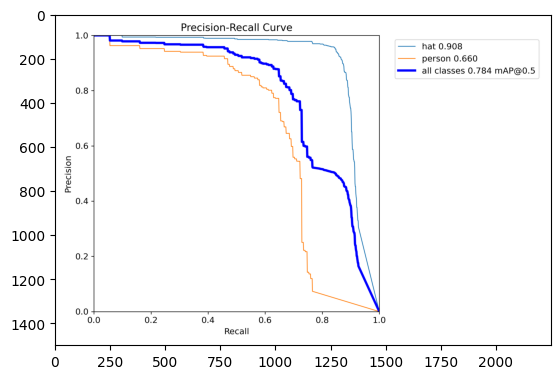

In [ ]:
img = plt.imread('PR_curve.png')
plt.imshow(img)

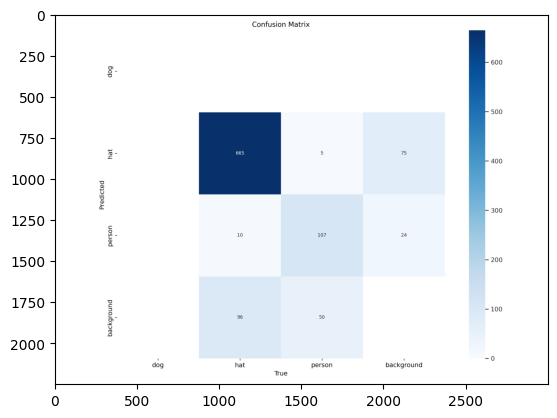

In [ ]:
img = plt.imread('confusion_matrix.png')
plt.imshow(img)

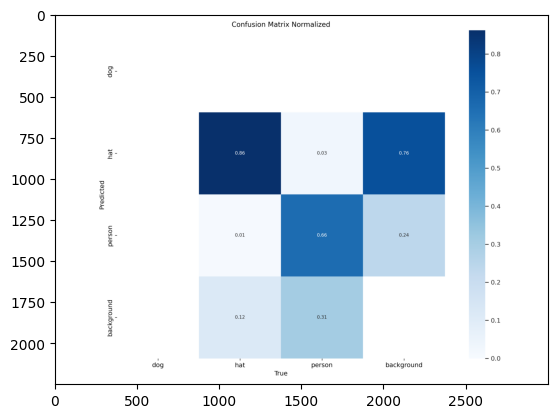

In [ ]:
img = plt.imread('confusion_matrix_normalized.png')
plt.imshow(img)

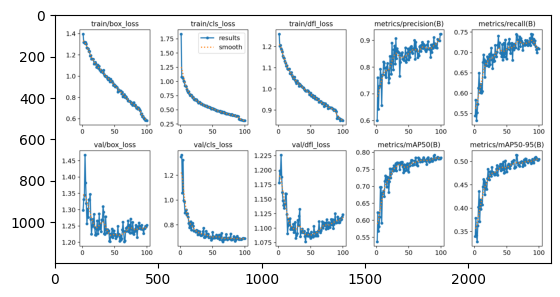

In [ ]:
img = plt.imread('results.png')
plt.imshow(img)

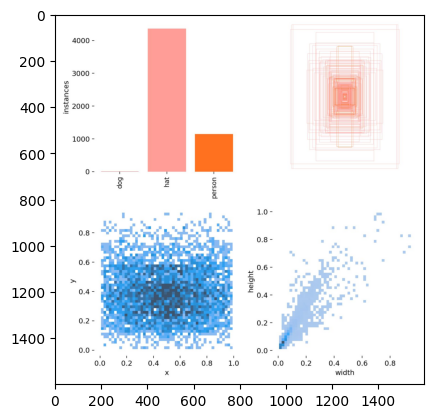

In [ ]:
img = plt.imread('labels.jpg')
plt.imshow(img)

In [ ]:
img = plt.imread('val_batch1_pred.jpg')
plt.imshow(img)

NameError: name 'plt' is not defined

In [ ]:
def calculate_statistics(self) -> tuple:
    """
    Calculate precision, recall, and f1 score for the evaluation.

    Returns:
        precision: The precision of the model
        recall: The recall of the the model
        f1: The f1 score of the model
    """
    cf = self.combined_cf

    # compute precision, recall, and f1 score
    tp = 0
    fp = 0
    fn = 0

    for x in range(len(self.class_names)):  # ground truth
        for y in range(len(self.class_names)):  # predictions
            if (
                x == len(self.class_names) - 1
            ):  # last column / prediction with no ground truth
                fp += cf[(x, y)]
            elif (
                y == len(self.class_names) - 1
            ):  # bottom row / ground truth with no prediction
                fn += cf[(x, y)]
            elif x == y:  # true positives across the diagonal
                tp += cf[(x, y)]
            else:  # misclassification
                fp += cf[(x, y)]

    if tp + fp == 0:
        precision = 1
    else:
        precision = tp / (tp + fp)

    if tp + fn == 0:
        recall = 1
    else:
        recall = tp / (tp + fn)

    if precision + recall == 0:
        f1 = 0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)

    return EvaluatorResponse(
        true_positives=tp,
        false_positives=fp,
        false_negatives=fn,
        precision=precision,
        recall=recall,
        f1=f1,
    )

In [ ]:
calculate_statistics(self)

NameError: name 'self' is not defined

In [ ]:
!git clone https://github.com/roboflow/cvevals.git


Cloning into 'cvevals'...
remote: Enumerating objects: 509, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 509 (delta 81), reused 76 (delta 32), pack-reused 354
Receiving objects: 100% (509/509), 1.02 MiB | 3.46 MiB/s, done.
Resolving deltas: 100% (254/254), done.


In [ ]:
!ls

cvevals  sample_data


In [ ]:
import os
os.chdir('/content/cvevals')

In [ ]:
!pip install -r requirements.txt
!pip install -e .

In [ ]:
!python3 examples/roboflow_example.py --eval_data_path <path_to_eval_data> \
--roboflow_workspace_url <workspace_url> \
--roboflow_project_url <project_url> \
--roboflow_model_version <model_version>